In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.linear_model import LinearRegression
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

Загрузим исходные данные

In [2]:
train = pd.read_csv("data/train.csv")

Получим общее представление о наших данных

In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
train.shape

(1460, 81)

In [5]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [6]:
train.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
                  ...   
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual       object
TotRmsAbvGrd       int64
Functional        object
Fireplaces         int64
FireplaceQu       object
GarageType        object
GarageYrBlt      float64


In [7]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


Уберем столбец ID, так как он не несет полезной информации

In [8]:
train.drop("Id", axis = 1, inplace = True)

Проанализируем отсутсвующие данные, если таковые имеются

In [9]:
def missing_data_table(df):
    total = df.isnull().sum().sort_values(ascending=False)
    missing_data = pd.concat([total], axis=1, keys=['Total'])
    nonzero = np.count_nonzero(total)
    return missing_data.head(nonzero) 

In [10]:
missing_data_table(train)

,Total
PoolQC,1453
MiscFeature,1406
Alley,1369
Fence,1179
FireplaceQu,690
LotFrontage,259
GarageType,81
GarageCond,81
GarageFinish,81
GarageQual,81


Совершим некоторые замены, исходя из информации, которая шла вместе с данным набором данных, а именно то, что NA в некоторых столбах говорит не об отсутсвии данных, а лишь о том, что в доме отсутсвует что-либо, например гараж, камин или бассейн

In [11]:
train["PoolQC"] = train["PoolQC"].fillna("None") #No Pool
train["MiscFeature"] = train["MiscFeature"].fillna("None") #None
train["Alley"] = train["Alley"].fillna("NoAc") #No alley access
train["Fence"] = train["Fence"].fillna("None") #No Fence
train["FireplaceQu"] = train["FireplaceQu"].fillna("None") #No Fireplace
train["GarageType"] = train["GarageType"].fillna("None") #No Garage
train["GarageQual"] = train["GarageQual"].fillna("None") #No Garage
train["GarageCond"] = train["GarageCond"].fillna("None") #No Garage
train["GarageFinish"] = train["GarageFinish"].fillna("None") #No Garage
train["GarageYrBlt"] = train["GarageYrBlt"].fillna("None") #No Garage
train["BsmtExposure"] = train["BsmtExposure"].fillna("None") #No Basement
train["BsmtFinType2"] = train["BsmtFinType2"].fillna("None") #No Basement
train["BsmtQual"] = train["BsmtQual"].fillna("None") #No Basement
train["BsmtCond"] = train["BsmtCond"].fillna("None") #No Basement
train["BsmtFinType1"] = train["BsmtFinType1"].fillna("None") #No Basement

Ознакомившись с терминологией, я могу утверждать, что LotFrontage не может отсутсвовать или быть равным нулю, т.е. это просто неполные данные. Значит нам либо следует выбросить эти значения(плохая идея), либо исключить эту переменную(тоже плохая идея), либо заменить отсутсвующие значения на что-то разумное(хорошая идея). Заменим их на среднее значение(округленное).
Источник: https://www.gimme-shelter.com/frontage-50043/

In [12]:
train["LotFrontage"] = train["LotFrontage"].fillna(int(train["LotFrontage"].mean()))
train = train.astype({"LotFrontage": "int64"})

MasVnrArea и MasVnrType имеют по 8 отсутсвующих значений, в файле описания имеется пункт None, поэтому смело заменим их на None

In [13]:
train["MasVnrArea"] = train["MasVnrArea"].fillna(0) #None
train["MasVnrType"] = train["MasVnrType"].fillna("None") #None
train = train.astype({"MasVnrArea": "int64"})

С Electrical выходит сложнее всего, но отсутсвует всего одно наблюдение, так что просто заменим, его на самое популярное

In [14]:
print(train["Electrical"].value_counts())
train["Electrical"] = train["Electrical"].fillna("SBrkr")

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64


Убедимся, что мы избавились от всех неизвестных значений

In [15]:
missing_data_table(train)

,Total


Теперь заменим качественные переменные оценки качества на количественные аналоги по балльной шкале (0, если отсутсвует)

In [16]:
train = train.replace({"BsmtCond" : {"None" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "BsmtExposure" : {"None" : 0, "No" : 1, "Mn" : 2, "Av": 3, "Gd" : 4},
                       "BsmtFinType1" : {"None" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, "ALQ" : 5, "GLQ" : 6},
                       "BsmtFinType2" : {"None" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, "ALQ" : 5, "GLQ" : 6},
                       "BsmtQual" : {"None" : 0, "Po" : 1, "Fa" : 2, "TA": 3, "Gd" : 4, "Ex" : 5},
                       "ExterCond" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                       "ExterQual" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                       "FireplaceQu" : {"None" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "Functional" : {"Sal" : 1, "Sev" : 2, "Maj2" : 3, "Maj1" : 4, "Mod": 5, "Min2" : 6, 
                                       "Min1" : 7, "Typ" : 8},
                       "GarageCond" : {"None" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "GarageQual" : {"None" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "HeatingQC" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "KitchenQual" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "LandSlope" : {"Sev" : 1, "Mod" : 2, "Gtl" : 3},
                       "PavedDrive" : {"N" : 0, "P" : 1, "Y" : 2},
                       "PoolQC" : {"None" : 0, "Fa" : 1, "TA" : 2, "Gd" : 3, "Ex" : 4},
                       "Utilities" : {"ELO" : 1, "NoSeWa" : 2, "NoSewr" : 3, "AllPub" : 4}}
                     )

Посмотрим на наши новые данные

In [17]:
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65,8450,Pave,NoAc,Reg,Lvl,4,Inside,...,0,0,None,None,0,2,2008,WD,Normal,208500
1,20,RL,80,9600,Pave,NoAc,Reg,Lvl,4,FR2,...,0,0,None,None,0,5,2007,WD,Normal,181500
2,60,RL,68,11250,Pave,NoAc,IR1,Lvl,4,Inside,...,0,0,None,None,0,9,2008,WD,Normal,223500
3,70,RL,60,9550,Pave,NoAc,IR1,Lvl,4,Corner,...,0,0,None,None,0,2,2006,WD,Abnorml,140000
4,60,RL,84,14260,Pave,NoAc,IR1,Lvl,4,FR2,...,0,0,None,None,0,12,2008,WD,Normal,250000


Теперь посмотрим на тепловую карту

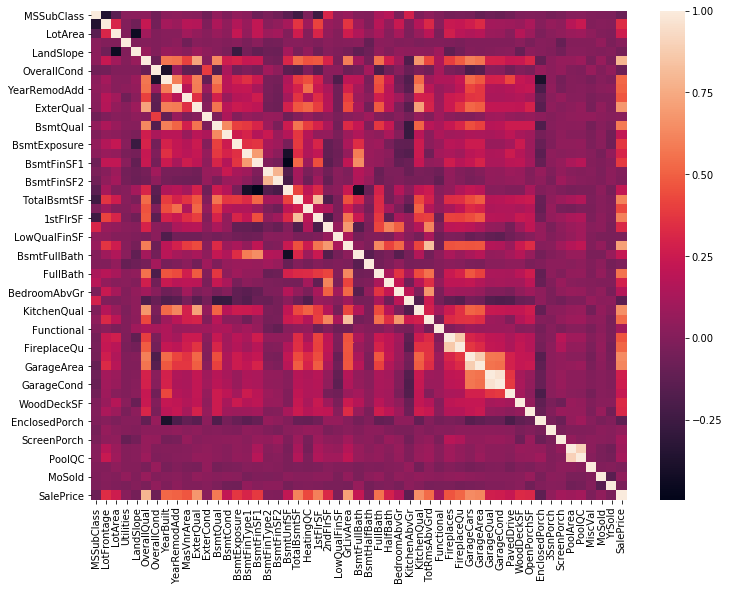

In [18]:
corrmat = train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat)

Соберем все корреляции и посмотрим на самые коррелированные пары

In [19]:
s = train.corr().unstack()
all_correlations = s.sort_values(kind="quicksort")

all_correlations = all_correlations.iloc[::2]
all_correlations = all_correlations[all_correlations != 1]

Выберем 10 самых обратно коррелированных пар

In [20]:
all_correlations.head(10)

BsmtUnfSF      BsmtFinSF1     -0.495251
LotArea        LandSlope      -0.436868
BsmtUnfSF      BsmtFullBath   -0.422900
               BsmtFinType1   -0.400184
EnclosedPorch  YearBuilt      -0.387268
OverallCond    YearBuilt      -0.375983
LotFrontage    MSSubClass     -0.357042
BsmtQual       KitchenAbvGr   -0.277731
KitchenAbvGr   BsmtCond       -0.268024
LandSlope      BsmtExposure   -0.261883
dtype: float64

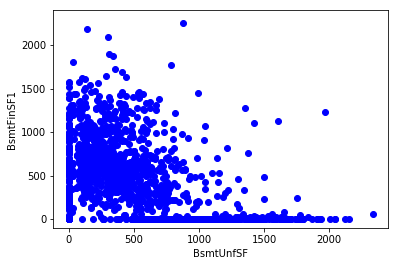

In [21]:
plt.scatter(train["BsmtUnfSF"], train["BsmtFinSF1"], c = "blue", marker = "o")
plt.xlabel("BsmtUnfSF")
plt.ylabel("BsmtFinSF1")
plt.ylim(-100, 2400)
plt.show()

Площадь незаконченной части подвала обратно коррелирует с площадью законченной части, что очень логично. 

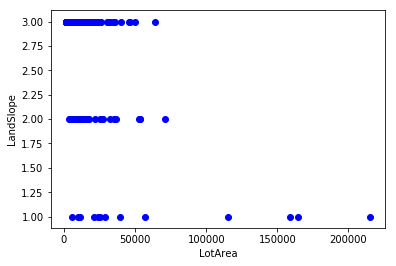

In [22]:
plt.scatter(train["LotArea"], train["LandSlope"], c = "blue", marker = "o")
plt.xlabel("LotArea")
plt.ylabel("LandSlope")
plt.show()

Площадь участка тем больше, чем больше уклон. Это странно, потому что вообще говоря, фактор уклона не должен влиять на площадь участка и наоборот.

In [23]:
train["LandSlope"].value_counts()

3    1382
2      65
1      13
Name: LandSlope, dtype: int64

У нас непропорционально много участков с маленьким уклоном, из-за чего уклон участка не дает на большого количества информации. Корреляцией между площадью участка и уклоном можно принебречь.

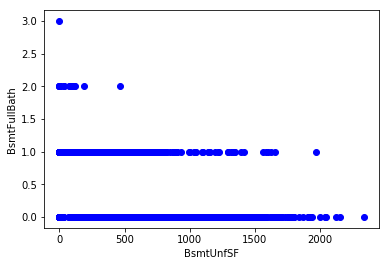

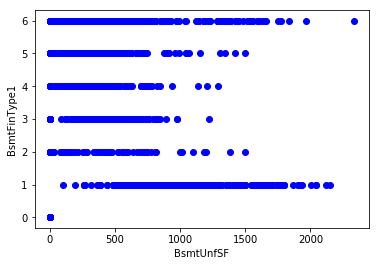

In [24]:
plt.scatter(train["BsmtUnfSF"], train["BsmtFullBath"], c = "blue", marker = "o")
plt.xlabel("BsmtUnfSF")
plt.ylabel("BsmtFullBath")
plt.show()

plt.scatter(train["BsmtUnfSF"], train["BsmtFinType1"], c = "blue", marker = "o")
plt.xlabel("BsmtUnfSF")
plt.ylabel("BsmtFinType1")
plt.show()

Обратная корреляция между площадью незаконченной части подвала и количеством ванных комнат в подвале является логичной, потому что, если в доме большой участок незаконченного подвала, вряд ли в нем много чего есть(ванных комнат в том числе). 
Обратная корреляция с рейтингом законченной части подвала также объяснима, потому что у нас единицой кодируются незаконченные подвалы, а подвал с большой незаконченной площадью является незаконченным подвалом.

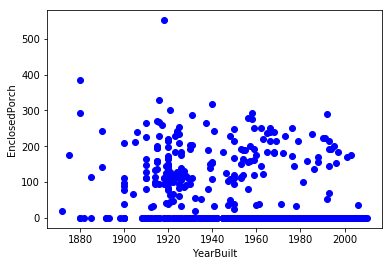

In [25]:
plt.scatter(train["YearBuilt"], train["EnclosedPorch"], c = "blue", marker = "o")
plt.xlabel("YearBuilt")
plt.ylabel("EnclosedPorch")
plt.show()

Исходя из обратной корреляции между площадью закрытой веранды и годом постройки можно сделать вывод, что в новых домах веранды делают меньших размеров, либо они вовсе отсутсвуют в новых домах чаще.

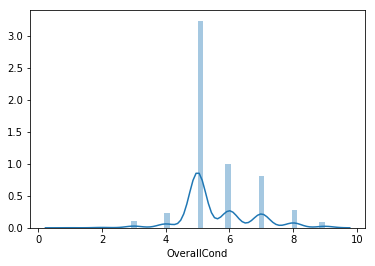

In [26]:
sns.distplot(train["OverallCond"])

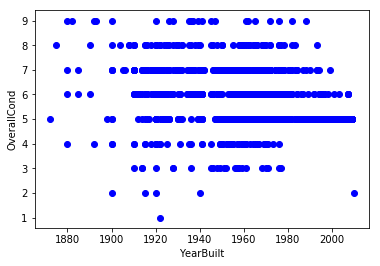

In [27]:
plt.scatter(train["YearBuilt"], train["OverallCond"], c = "blue", marker = "o")
plt.xlabel("YearBuilt")
plt.ylabel("OverallCond")
plt.show()

У нас есть несильная обратная корреляция между качеством дома и годом постройки, что очень нелогично. Думаю тут решающим фактором является большое количество средних оценок - 5. Последующие более слабые корреляции рассматривать не вижу смысла и на первый взгляд последующие пары переменных не имеют вообще никаких связей.

Выберем 10 самых коррелированных пар

In [28]:
all_correlations.tail(20)

BsmtCond      BsmtQual        0.633713
SalePrice     GarageCars      0.640409
BsmtFullBath  BsmtFinSF1      0.649212
SalePrice     KitchenQual     0.659600
OverallQual   KitchenQual     0.673331
BedroomAbvGr  TotRmsAbvGrd    0.676620
ExterQual     SalePrice       0.682639
2ndFlrSF      GrLivArea       0.687501
BsmtFinType1  BsmtFinSF1      0.695751
GrLivArea     SalePrice       0.708624
KitchenQual   ExterQual       0.716122
ExterQual     OverallQual     0.726278
BsmtFinType2  BsmtFinSF2      0.788986
OverallQual   SalePrice       0.790982
TotalBsmtSF   1stFlrSF        0.819530
GrLivArea     TotRmsAbvGrd    0.825489
Fireplaces    FireplaceQu     0.863241
GarageArea    GarageCars      0.882475
PoolQC        PoolArea        0.899924
GarageCond    GarageQual      0.959172
dtype: float64

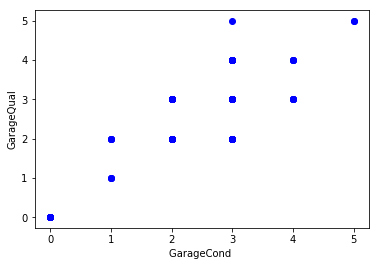

In [29]:
plt.scatter(train["GarageCond"], train["GarageQual"], c = "blue", marker = "o")
plt.xlabel("GarageCond ")
plt.ylabel("GarageQual")
plt.show()

Состояние гаража прекрасно коррелирует с его качеством, честно говоря, эти переменные даже по смыслу отличить немного сложно, так что корреляция вполне ясна.

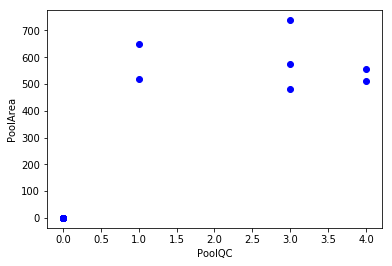

0    1453
3       3
4       2
1       2
Name: PoolQC, dtype: int64

In [30]:
plt.scatter(train["PoolQC"], train["PoolArea"], c = "blue", marker = "o")
plt.xlabel("PoolQC")
plt.ylabel("PoolArea")
plt.show()
train["PoolQC"].value_counts()

Размер бассейна положительно коррелирует с качеством бассейна, что вообще говоря, неверно, за большими бассейнами тяжело следить и держать в надлежащем качестве. У нас такая большая корреляция объяснется тем, что бассейны отсутсвуют практически во всех наблюдениях.

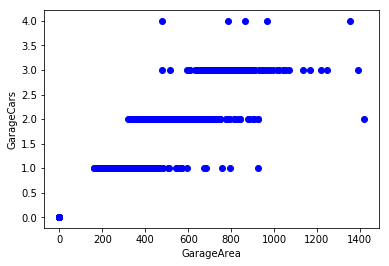

In [31]:
plt.scatter(train["GarageArea"], train["GarageCars"], c = "blue", marker = "o")
plt.xlabel("GarageArea")
plt.ylabel("GarageCars")
plt.show()

Размер гаража в машинах и в квадратных футах хорошо коррелируют, потому что в маленький гараж вряд ли поместиться много машин и наоборот.

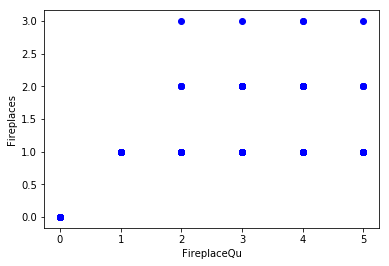

0    690
4    380
3    313
2     33
5     24
1     20
Name: FireplaceQu, dtype: int64

In [32]:
plt.scatter(train["FireplaceQu"], train["Fireplaces"], c = "blue", marker = "o")
plt.xlabel("FireplaceQu")
plt.ylabel("Fireplaces")
plt.show()
train["FireplaceQu"].value_counts()

Количество каминов коррелирует с качеством каминов в большей степени из-за домов, в которых каминов нет.

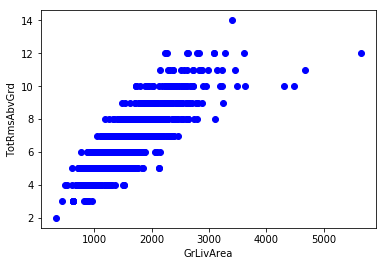

In [33]:
plt.scatter(train["GrLivArea"], train["TotRmsAbvGrd"], c = "blue", marker = "o")
plt.xlabel("GrLivArea")
plt.ylabel("TotRmsAbvGrd")
plt.show()

Жилплощадь над уровнем земли и количество комнат над уровнем земли очень хорошо коррелируют, по очевидным причинам. Интересно, что даже можно заметить прямую линию, ниже которой соотношение комнат к жилплощади не падает.

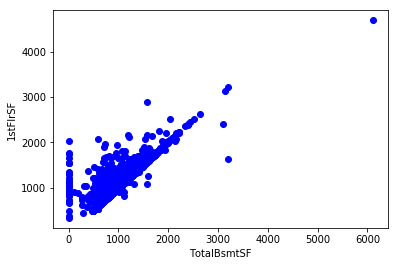

In [34]:
plt.scatter(train["TotalBsmtSF"], train["1stFlrSF"], c = "blue", marker = "o")
plt.xlabel("TotalBsmtSF")
plt.ylabel("1stFlrSF")
plt.show()

Площадь подвала и первого этажа хорошо коррелируют. Очень хорошо видна линия - y=x, ниже которой соотношение площадей почти не падает, что можно трактовать как то, что в большинстве домов размер подвала либо меньше, либо совпадает с размером первого этажа.

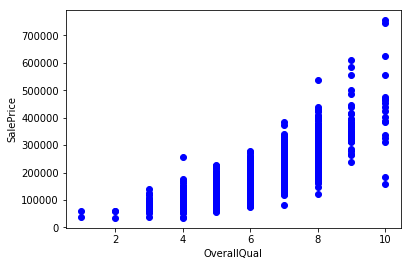

In [35]:
plt.scatter(train["OverallQual"], train["SalePrice"], c = "blue", marker = "o")
plt.xlabel("OverallQual")
plt.ylabel("SalePrice")
plt.show()

Стоимость дома сильно коррелирует с общей оценкой качества, причем можно даже заметить, что график больше походит на квадратичный или экспоненциальный рост.

По следующим корреляциям пробежимся быстро, подробно остановившись лишь на паре.

BsmtFinType2 и BsmtFinSF2 хорошо коррелируют, из-за незаконченных подвалов. ExterQual и OverallQual видимо из-за того, что первая учитывалсь при вычислении второй. KitchenQual и ExterQual - интересная корреляция, качество экстерьера и кухонь вообще говоря не должно быть связано. GrLivArea и SalePrice, на этом остановимся подробнее. BsmtFinType1 и BsmtFinSF1, аналогично BsmtFinType2 и BsmtFinSF2. 2ndFlrSF и GrLivArea - первой входит в состав второго. ExterQual и SalePrice коррелируют из-за пар ExterQual и OverallQual, OverallQual и SalePrice. BedroomAbvGr и TotRmsAbvGrd первое входит в состав второго. OverallQual и  KitchenQual аналогично ExterQual и OverallQual. SalePrice и KitchenQual аналогично ExterQual и SalePrice. BsmtFullBath и BsmtFinSF1 хорошо коррелируют, из-за незаконченных подвалов и подвалов без ванных комнат. SalePrice и GarageCars остановимся подробнее. BsmtCond и BsmtQual имеют похожий смысл.

Зависимость цены от жилплощади вполне очевидна.

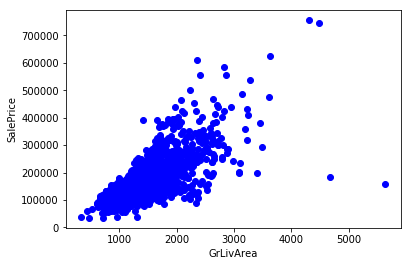

In [36]:
plt.scatter(train["GrLivArea"], train["SalePrice"], c = "blue", marker = "o")
plt.xlabel("GrLivArea")
plt.ylabel("SalePrice")
plt.show()

Видим хороший график линейной зависимости цены от жилплощади, с двумя странными значениями, очень большие участки, которые стоят очень дешево. Также видим пару очень дорогих участков, которые укладываются в общий тренд цены.

Размер гаража и цена сильно коррелируют. Прямая закономерность понятна, однако сила корреляции немного неожиданна для меня. Видимо размер гаража очень сильно важен при покупке дома.

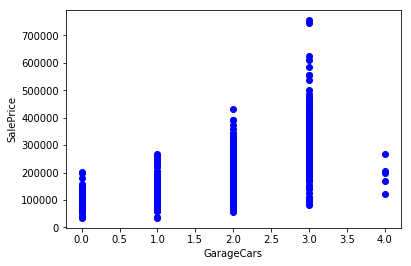

In [37]:
plt.scatter(train["GarageCars"], train["SalePrice"], c = "blue", marker = "o")
plt.xlabel("GarageCars")
plt.ylabel("SalePrice")
plt.show()

На графике видим, что рост даже не совсем линейный, а скорее квадратичный или экспоненциальный.

Попробуем предсказать цены на дома. Для начала посмотрим на гистрограмму распределения цен.

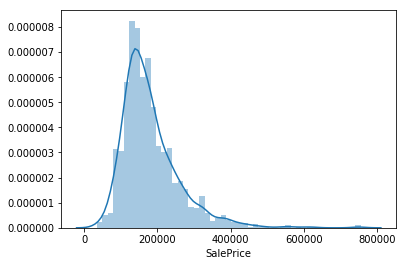

In [38]:
sns.distplot(train['SalePrice'])

Видим достаточно острый пик и свещение вправо. Посчитаем коэффициент эксцесса и ассиметрию.

In [39]:
train["SalePrice"].skew(), train["SalePrice"].kurt()

(1.8828757597682129, 6.536281860064529)

Применим логарифмическое преобразование, чтобы исправить эти недостатки и сделать наше распредление больше похожим на нормальное.

In [40]:
train["SalePrice"] = np.log1p(train["SalePrice"])
y = train["SalePrice"]

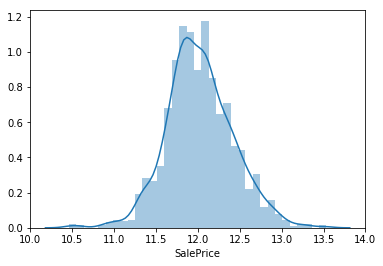

In [41]:
sns.distplot(train['SalePrice'])

Гистограмма выглядит значительно лучше.

In [42]:
def rmse_cv_train(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, y_train, scoring = make_scorer(mean_squared_error, greater_is_better = False), cv = 10))
    return(rmse)

def rmse_cv_test(model):
    rmse= np.sqrt(-cross_val_score(model, X_test, y_test, scoring = make_scorer(mean_squared_error, greater_is_better = False), cv = 10))
    return(rmse)

Построим модель линейной регрессии от 3 наших самых важных переменных - "GrLivArea", "OverallQual" и "GarageCars".

In [43]:
X_train, X_test, y_train, y_test = train_test_split(train, y, test_size = 0.3, random_state = 777)

X_train=X_train[["GrLivArea", "OverallQual", "GarageCars"]]
X_test=X_test[["GrLivArea", "OverallQual", "GarageCars"]]

RMSE of Train data: 0.19469156500703785
RMSE of Test data: 0.16955240200119798


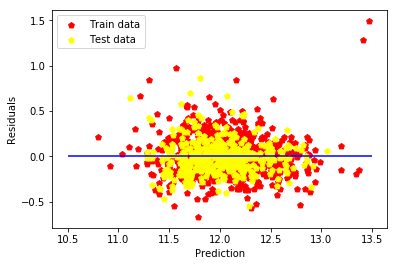

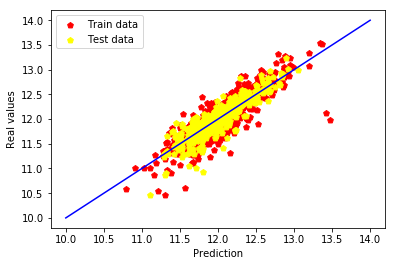

In [44]:
lr = LinearRegression()
lr.fit(X_train, y_train)

print("RMSE of Train data:", rmse_cv_train(lr).mean())
print("RMSE of Test data:", rmse_cv_test(lr).mean())
y_train_p = lr.predict(X_train)
y_test_p = lr.predict(X_test)

plt.scatter(y_train_p, y_train_p - y_train, c = "red", marker = "p", label = "Train data")
plt.scatter(y_test_p, y_test_p - y_test, c = "yellow", marker = "p", label = "Test data")
plt.xlabel("Prediction")
plt.ylabel("Residuals")
plt.legend(loc = "best fit")
plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "blue")
plt.show()

plt.scatter(y_train_p, y_train, c = "red", marker = "p", label = "Train data")
plt.scatter(y_test_p, y_test, c = "yellow", marker = "p", label = "Test data")
plt.xlabel("Prediction")
plt.ylabel("Real values")
plt.legend(loc = "best fit")
plt.plot([10, 14], [10, 14], c = "blue")
plt.show()

За исключением 2 выбросов Train data, модель получилась достаточно неплохой, остатки хорошо распределены, значения обоих выборок хорошо ложатся на линию.